In [1]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.1.0'

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\hp\python3.7\projects\monkey breed\training',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16)

Found 1098 images belonging to 10 classes.


In [7]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(r'C:\Users\hp\python3.7\projects\monkey breed\validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


In [8]:
# Lets make CNN

In [9]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
# Lets Train

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 69 steps, validate for 17 steps
Epoch 1/30
69/69 [==============================] - 60s 874ms/step - loss: 0.1731 - accuracy: 0.9399 - val_loss: 1.9408 - val_accuracy: 0.6507
Epoch 2/30
69/69 [==============================] - 59s 854ms/step - loss: 0.1453 - accuracy: 0.9526 - val_loss: 2.0146 - val_accuracy: 0.6544
Epoch 3/30
69/69 [==============================] - 57s 830ms/step - loss: 0.1906 - accuracy: 0.9326 - val_loss: 1.8026 - val_accuracy: 0.6250
Epoch 4/30
69/69 [==============================] - 58s 835ms/step - loss: 0.1681 - accuracy: 0.9426 - val_loss: 1.8985 - val_accuracy: 0.6728
Epoch 5/30
69/69 [==============================] - 57s 826ms/step - loss: 0.1747 - accuracy: 0.9435 - val_loss: 2.0060 - val_accuracy: 0.6250
Epoch 6/30
69/69 [==============================] - 58s 843ms/step - loss: 0.1530 - accuracy: 0.9508 - val_loss: 1.8477 - val_accuracy: 0.6544
Epoch 7/30
69/69 [==============================] 

In [23]:
history.model.save(r'C:\Users\hp\python3.7\projects\monkey breed\model\model-30.h5')

In [24]:
model=tf.keras.models.load_model(r'C:\Users\hp\python3.7\projects\monkey breed\model\model-30.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

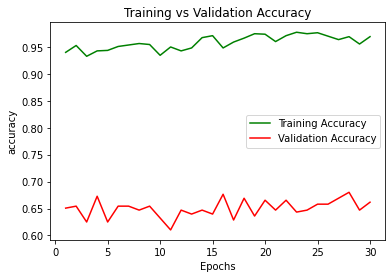

In [26]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

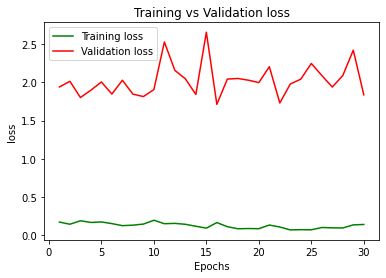

In [27]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [28]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

In [29]:
txt=pd.read_csv(r'C:\Users\hp\python3.7\projects\monkey breed\monkey_labels.txt')

In [30]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


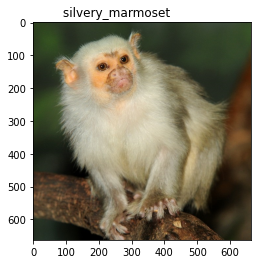

In [41]:
test_image=r'C:\Users\hp\python3.7\projects\monkey breed\validation\n6\n602.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()